In [ ]:
from imblearn.over_sampling import ADASYN
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import RandomOverSampler
from matplotlib import pyplot
import pandas as pd
import numpy as np
from pandas import read_csv
from pandas import DataFrame
import matplotlib.pyplot as plt
import seaborn as sns
import pandas
from collections import Counter
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
import time
from sklearn.model_selection import RepeatedKFold, cross_validate, train_test_split
from sklearn.metrics import make_scorer, precision_score, recall_score, f1_score, roc_auc_score, matthews_corrcoef, classification_report,confusion_matrix,accuracy_score

from sklearn.model_selection import cross_val_predict
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import GradientBoostingClassifier
from lightgbm import LGBMClassifier
from sklearn.neural_network import MLPClassifier
import numpy
from sklearn import metrics

In [ ]:
df = read_csv('creditcard.csv', engine='python')

In [ ]:
# define the x(Features) the y(Label) from the data
X_adasyn=df.drop("Class",axis=1).values
y_adasyn=df["Class"].values

In [ ]:
# Apply ADASYN to the training set (sampling_strategy=0.3)
# adasyn = RandomOverSampler(sampling_strategy=0.3, random_state=1)
# X_adasyn, y_adasyn = adasyn.fit_resample(X, y)

In [ ]:
# Split the dataset into training and testing sets
X_trainA, X_testA, y_trainA, y_testA = train_test_split(X_adasyn, y_adasyn, test_size=0.25, random_state=1)

In [ ]:
# Stantiating models

DT = DecisionTreeClassifier(random_state=0)
LR = LogisticRegression(random_state=0, max_iter=500)
KNN = KNeighborsClassifier()
RF = RandomForestClassifier(random_state=0)
LGBM = LGBMClassifier(random_state=0)
MLPC = MLPClassifier(random_state=0, max_iter=1500)
XGB = XGBClassifier(random_state=0)
# gbm = GradientBoostingClassifier(base_estimator=DT)

# history_DT = DT.fit(X_trainA, y_trainA)
# DT.compile(metrics = (['precision', 'recall', 'f1', 'roc_auc', 'matthews_corrcoef']))
# y_pred_DT = DT.predict(X_testA)


In [ ]:
#Training models
history_DT = DT.fit(X_trainA, y_trainA)
history_LR = LR.fit(X_trainA, y_trainA)
history_KNN = KNN.fit(X_trainA, y_trainA)
history_RF = RF.fit(X_trainA, y_trainA)
history_LGBM = LGBM.fit(X_trainA, y_trainA)
history_XGB = XGB.fit(X_trainA, y_trainA)
history_MLPC = MLPC.fit(X_trainA, y_trainA)

In [ ]:
# Making predictions on test data
y_pred_DT = DT.predict(X_testA)
y_pred_LR = LR.predict(X_testA)
y_pred_KNN = KNN.predict(X_testA)
y_pred_RF = RF.predict(X_testA)
y_pred_LGBM = LGBM.predict(X_testA)
y_pred_XGB = XGB.predict(X_testA)
y_pred_MLPC = MLPC.predict(X_testA)

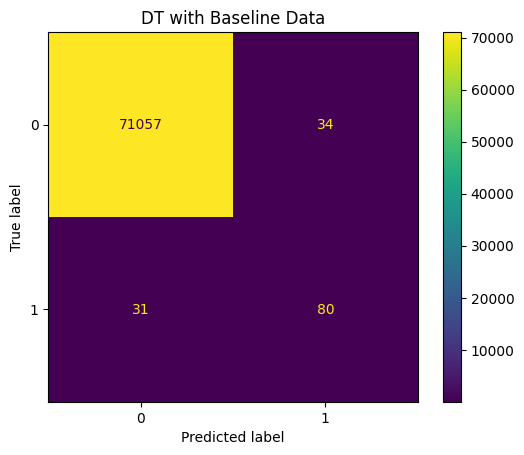

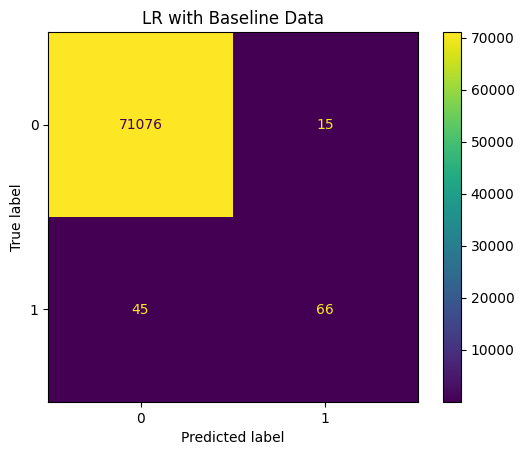

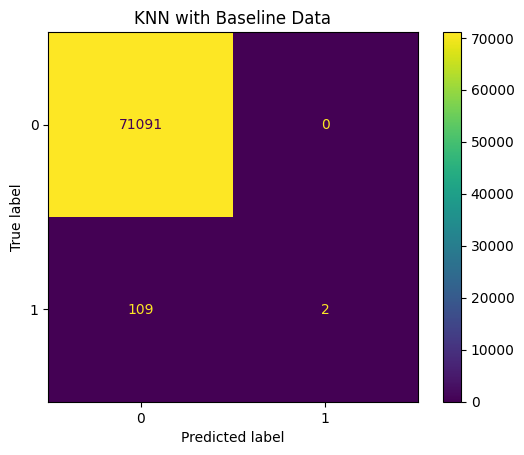

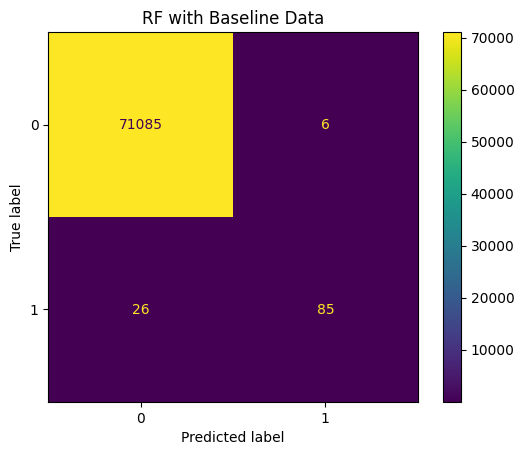

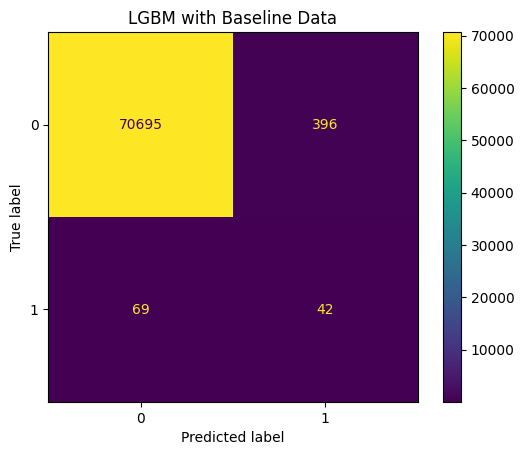

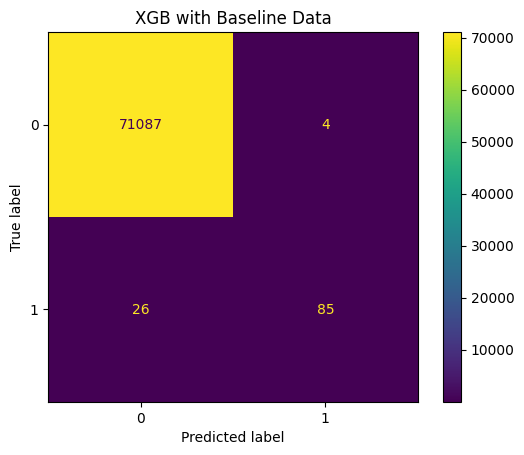

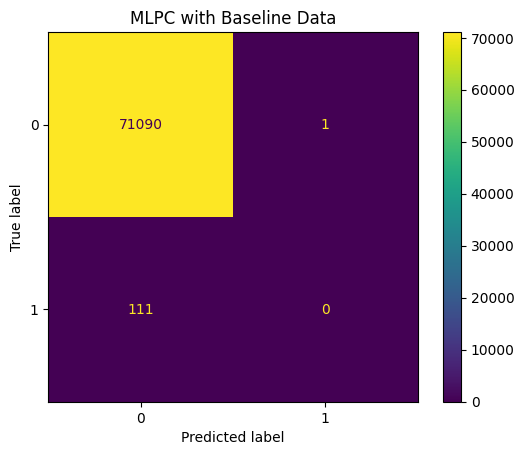

In [ ]:
confusion_matrix = metrics.confusion_matrix(y_testA, y_pred_DT)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [0, 1])
cm_display.plot()
cm_display.ax_.set_title('DT with Baseline Data')
# plt.show()
plt.savefig('DT with Baseline Data.jpg', dpi=1200)

confusion_matrix = metrics.confusion_matrix(y_testA, y_pred_LR)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [0, 1])
cm_display.plot()
cm_display.ax_.set_title('LR with Baseline Data')
# plt.show()
plt.savefig('LR with Baseline Data.jpg', dpi=1200)

confusion_matrix = metrics.confusion_matrix(y_testA, y_pred_KNN)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [0, 1])
cm_display.plot()
cm_display.ax_.set_title('KNN with Baseline Data')
# plt.show()
plt.savefig('KNN with Baseline Data.jpg', dpi=1200)

confusion_matrix = metrics.confusion_matrix(y_testA, y_pred_RF)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [0, 1])
cm_display.plot()
cm_display.ax_.set_title('RF with Baseline Data')
# plt.show()
plt.savefig('RF with Baseline Data.jpg', dpi=1200)

confusion_matrix = metrics.confusion_matrix(y_testA, y_pred_LGBM)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [0, 1])
cm_display.plot()
cm_display.ax_.set_title('LGBM with Baseline Data')
# plt.show()
plt.savefig('LGBM with Baseline Data.jpg', dpi=1200)

confusion_matrix = metrics.confusion_matrix(y_testA, y_pred_XGB)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [0, 1])
cm_display.plot()
cm_display.ax_.set_title('XGB with Baseline Data')
# plt.show()
plt.savefig('XGB with Baseline Data.jpg', dpi=1200)

confusion_matrix = metrics.confusion_matrix(y_testA, y_pred_MLPC)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [0, 1])
cm_display.plot()
cm_display.ax_.set_title('MLPC with Baseline Data')
# plt.show()
plt.savefig('MLPC with Baseline Data.jpg', dpi=1200)


In [ ]:
cv = KFold(n_splits=10, random_state=0, shuffle=True)

y_pred_DT = cross_val_predict(DT, X_trainA, y_trainA, cv=cv)
y_pred_LR = cross_val_predict(LR, X_trainA, y_trainA, cv=cv)
y_pred_KNN = cross_val_predict(KNN, X_trainA, y_trainA, cv=cv)
y_pred_RF = cross_val_predict(RF, X_trainA, y_trainA, cv=cv)
y_pred_LGBM = cross_val_predict(LGBM, X_trainA, y_trainA, cv=cv)
y_pred_XGB = cross_val_predict(XGB, X_trainA, y_trainA, cv=cv)
y_pred_MLPC = cross_val_predict(MLPC, X_trainA, y_trainA, cv=cv)

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _che

In [ ]:
print('......')

......


In [ ]:
# performance metrics
print('...............')
print('DT:')
# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(y_trainA, y_pred_DT)
print('Accuracy: %.4f' % accuracy)
# precision tp / (tp + fp)
precision = precision_score(y_trainA, y_pred_DT)
print('Precision: %.4f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(y_trainA, y_pred_DT)
print('Recall: %.4f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(y_trainA, y_pred_DT)
print('F1 score: %.4f' % f1)
MCC = matthews_corrcoef(y_trainA, y_pred_DT)
print('MCC: %.4f' % (MCC))

# performance metrics
print('...............')
print('LR:')
# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(y_trainA, y_pred_LR)
print('Accuracy: %.4f' % accuracy)
# precision tp / (tp + fp)
precision = precision_score(y_trainA, y_pred_LR)
print('Precision: %.4f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(y_trainA, y_pred_LR)
print('Recall: %.4f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(y_trainA, y_pred_LR)
print('F1 score: %.4f' % f1)
MCC = matthews_corrcoef(y_trainA, y_pred_LR)
print('MCC: %.4f' % (MCC))

# performance metrics
print('...............')
print('KNN:')
# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(y_trainA, y_pred_KNN)
print('Accuracy: %.4f' % accuracy)
# precision tp / (tp + fp)
precision = precision_score(y_trainA, y_pred_KNN)
print('Precision: %.4f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(y_trainA, y_pred_KNN)
print('Recall: %.4f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(y_trainA, y_pred_KNN)
print('F1 score: %.4f' % f1)
MCC = matthews_corrcoef(y_trainA, y_pred_KNN)
print('MCC: %.4f' % (MCC))

# performance metrics
print('...............')
print('RF:')
# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(y_trainA, y_pred_RF)
print('Accuracy: %.4f' % accuracy)
# precision tp / (tp + fp)
precision = precision_score(y_trainA, y_pred_RF)
print('Precision: %.4f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(y_trainA, y_pred_RF)
print('Recall: %.4f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(y_trainA, y_pred_RF)
print('F1 score: %.4f' % f1)
MCC = matthews_corrcoef(y_trainA, y_pred_RF)
print('MCC: %.4f' % (MCC))

# performance metrics
print('...............')
print('LGBM:')
# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(y_trainA, y_pred_LGBM)
print('Accuracy: %.4f' % accuracy)
# precision tp / (tp + fp)
precision = precision_score(y_trainA, y_pred_LGBM)
print('Precision: %.4f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(y_trainA, y_pred_LGBM)
print('Recall: %.4f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(y_trainA, y_pred_LGBM)
print('F1 score: %.4f' % f1)
MCC = matthews_corrcoef(y_trainA, y_pred_LGBM)
print('MCC: %.4f' % (MCC))

# performance metrics
print('...............')
print('XGB:')
# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(y_trainA, y_pred_XGB)
print('Accuracy: %.4f' % accuracy)
# precision tp / (tp + fp)
precision = precision_score(y_trainA, y_pred_XGB)
print('Precision: %.4f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(y_trainA, y_pred_XGB)
print('Recall: %.4f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(y_trainA, y_pred_XGB)
print('F1 score: %.4f' % f1)
MCC = matthews_corrcoef(y_trainA, y_pred_XGB)
print('MCC: %.4f' % (MCC))

# performance metrics
print('...............')
print('MLPC:')
# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(y_trainA, y_pred_MLPC)
print('Accuracy: %.4f' % accuracy)
# precision tp / (tp + fp)
precision = precision_score(y_trainA, y_pred_MLPC)
print('Precision: %.4f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(y_trainA, y_pred_MLPC)
print('Recall: %.4f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(y_trainA, y_pred_MLPC)
print('F1 score: %.4f' % f1)
MCC = matthews_corrcoef(y_trainA, y_pred_MLPC)
print('MCC: %.4f' % (MCC))

...............
DT:
Accuracy: 0.9993
Precision: 0.7995
Recall: 0.7848
F1 score: 0.7921
MCC: 0.7917
...............
LR:
Accuracy: 0.9992
Precision: 0.8490
Recall: 0.6640
F1 score: 0.7452
MCC: 0.7505
...............
KNN:
Accuracy: 0.9984
Precision: 0.9412
Recall: 0.0840
F1 score: 0.1542
MCC: 0.2809
...............
RF:
Accuracy: 0.9995
Precision: 0.9352
Recall: 0.7953
F1 score: 0.8596
MCC: 0.8622
...............
LGBM:
Accuracy: 0.9956
Precision: 0.2143
Recall: 0.5433
F1 score: 0.3073
MCC: 0.3394
...............
XGB:
Accuracy: 0.9996
Precision: 0.9509
Recall: 0.8136
F1 score: 0.8769
MCC: 0.8794
...............
MLPC:
Accuracy: 0.9982
Precision: 0.4956
Recall: 0.5932
F1 score: 0.5400
MCC: 0.5413
